# Titanic 

https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

http://blog.csdn.net/han_xiaoyang/article/details/49797143

> Kaggle Titanic 项目

## 导入所需模块以及设置 

In [86]:
#coding:utf-8
## 导入模块以及环境设置
import os,sys,time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
import sklearn.preprocessing as preprocessing
from sklearn import linear_model
from sklearn import cross_validation

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

%matplotlib inline

/home/helong/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 读取训练数据 

In [65]:
!ls

DataFrameGroupBy.ipynb	README.md  titanic.ipynb	train.csv
gender_submission.csv	test.csv   titanic字段说明.png	字段描述.md


In [66]:
titanic_train_data = pd.read_csv('train.csv')
titanic_train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


![titanic字段说明.png](./titanic字段说明.png)

## 数据信息 

### info 

In [67]:
titanic_train_data.info() # Age以及Cabin有数据丢失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### describe 

In [68]:
titanic_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 数据整体关系展示 

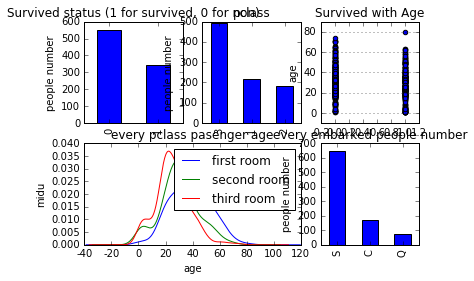

In [69]:
fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
titanic_train_data.Survived.value_counts().plot(kind='bar') # 获救人数图
plt.title(u"Survived status (1 for survived, 0 for non)")
plt.ylabel("people number")  

plt.subplot2grid((2,3),(0,1))
titanic_train_data.Pclass.value_counts().plot(kind="bar") # 乘客等级图
plt.ylabel("people number")
plt.title("pclass")

plt.subplot2grid((2,3),(0,2))
plt.scatter(titanic_train_data.Survived, titanic_train_data.Age) # 乘客幸存--年龄图
plt.ylabel("age")
plt.grid(b=True, which='major', axis='y') 
plt.title("Survived with Age")


plt.subplot2grid((2,3),(1,0), colspan=2)
titanic_train_data.Age[titanic_train_data.Pclass == 1].plot(kind='kde') # 乘客等级 -- 年龄图
titanic_train_data.Age[titanic_train_data.Pclass == 2].plot(kind='kde')
titanic_train_data.Age[titanic_train_data.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.ylabel("midu") 
plt.title("every pclass pasenger age")
plt.legend(('first room', 'second room','third room'),loc='best')


plt.subplot2grid((2,3),(1,2))
titanic_train_data.Embarked.value_counts().plot(kind='bar') # 登陆港口图
plt.title("every embarked people number")
plt.ylabel(u"people number")  

### 乘客等级 -- 幸存图 

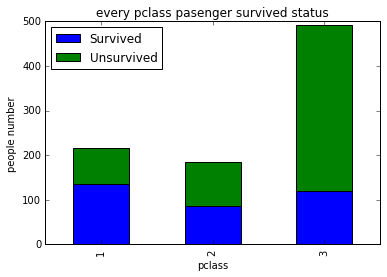

In [70]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = titanic_train_data.Pclass[titanic_train_data.Survived == 0].value_counts()
Survived_1 = titanic_train_data.Pclass[titanic_train_data.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"every pclass pasenger survived status")
plt.xlabel(u"pclass") 
plt.ylabel(u"people number") 

### 乘客性别 -- 获救图 

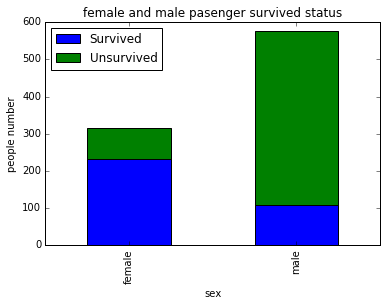

In [71]:
#看看各乘客性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = titanic_train_data.Sex[titanic_train_data.Survived == 0].value_counts()
Survived_1 = titanic_train_data.Sex[titanic_train_data.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"female and male pasenger survived status")
plt.xlabel(u"sex") 
plt.ylabel(u"people number") 

### 乘客登陆港口 -- 获救图 

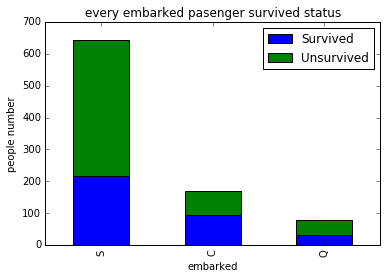

In [72]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = titanic_train_data.Embarked[titanic_train_data.Survived == 0].value_counts()
Survived_1 = titanic_train_data.Embarked[titanic_train_data.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"every embarked pasenger survived status")
plt.xlabel(u"embarked") 
plt.ylabel(u"people number") 

### 乘客丈夫妻子兄弟姐妹人数 -- 获救图 

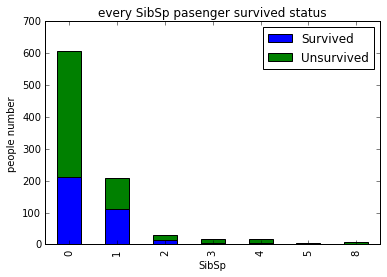

In [73]:
#看看各乘客丈夫妻子兄弟姐妹人数的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = titanic_train_data.SibSp[titanic_train_data.Survived == 0].value_counts()
Survived_1 = titanic_train_data.SibSp[titanic_train_data.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"every SibSp pasenger survived status")
plt.xlabel(u"SibSp") 
plt.ylabel(u"people number") 

### 乘客父母孩子人数 -- 获救图 

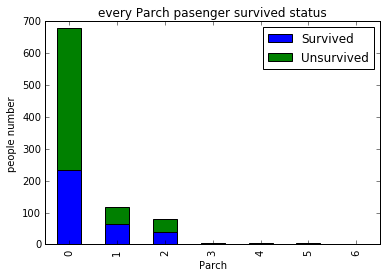

In [74]:
#看看各乘客父母孩子的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = titanic_train_data.Parch[titanic_train_data.Survived == 0].value_counts()
Survived_1 = titanic_train_data.Parch[titanic_train_data.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"every Parch pasenger survived status")
plt.xlabel(u"Parch") 
plt.ylabel(u"people number") 

### 乘客等级+性别 -- 获救图 

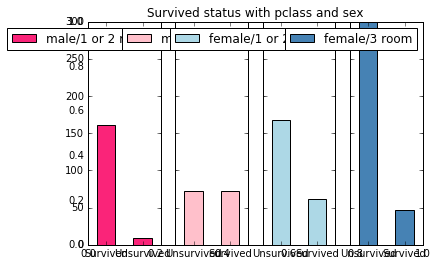

In [75]:
 #然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"Survived status with pclass and sex")

ax1=fig.add_subplot(141)
titanic_train_data.Survived[titanic_train_data.Sex == 'female'][titanic_train_data.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"Survived", u"Unsurvived"], rotation=0)
ax1.legend([u"male/1 or 2 room"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
titanic_train_data.Survived[titanic_train_data.Sex == 'female'][titanic_train_data.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"Unsurvived", u"Survived"], rotation=0)
plt.legend([u"male/3 room"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
titanic_train_data.Survived[titanic_train_data.Sex == 'male'][titanic_train_data.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"Unsurvived", u"Survived"], rotation=0)
plt.legend([u"female/1 or 2 room"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
titanic_train_data.Survived[titanic_train_data.Sex == 'male'][titanic_train_data.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"Unsurvived", u"Survived"], rotation=0)
plt.legend([u"female/3 room"], loc='best')

### 乘客舱号 -- 获救图 

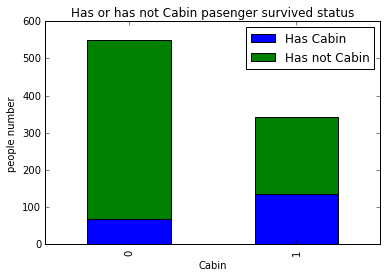

In [76]:
#看看各乘客是否有舱号的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

cabin_1 = titanic_train_data.Survived[pd.notnull(titanic_train_data.Cabin)].value_counts()
cabin_0 = titanic_train_data.Survived[pd.isnull(titanic_train_data.Cabin)].value_counts()
df=pd.DataFrame({u'Has Cabin':cabin_1, u'Has not Cabin':cabin_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Has or has not Cabin pasenger survived status")
plt.xlabel(u"Cabin") 
plt.ylabel(u"people number") 

## 数据预处理 

### 处理数据缺失 

先从最突出的数据属性开始吧，对，Cabin和Age，有丢失数据实在是对下一步工作影响太大。
1. 先说Cabin，暂时我们就按照刚才说的，按Cabin有无数据，将这个属性处理成Yes和No两种类型吧。
2. 再说Age,通常遇到缺值的情况，我们会有几种常见的处理方式
    2. 如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了
    3. 如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中
    4. 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。
    5. 有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据（比如按照称呼，miss或者mir来给出一个年龄）。


随机森林  https://segmentfault.com/a/1190000011835617

In [77]:
"""
用scikit-learn中的RandomForest来拟合一下缺失的年龄数据(注：RandomForest是一个用在原始数据中做不同采样，
建立多颗DecisionTree，再进行average等等来降低过拟合现象，提高结果的机器学习算法，我们之后会介绍到)
"""
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    # y即目标年龄
    y = known_age[:, 0]
    # X即特征属性值
    X = known_age[:, 1:]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1:])
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

titanic_train_data, rfr = set_missing_ages(titanic_train_data)
titanic_train_data = set_Cabin_type(titanic_train_data)
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


### 类目性数据因子化 

因为逻辑回归建模时，需要输入的特征都是数值型特征，我们通常会先对类目型的特征因子化。 
什么叫做因子化呢？举个例子：

以Cabin为例，原本一个属性维度，因为其取值可以是[‘yes’,’no’]，而将其平展开为’Cabin_yes’,’Cabin_no’两个属性
1. 原本Cabin取值为yes的，在此处的”Cabin_yes”下取值为1，在”Cabin_no”下取值为0
2. 原本Cabin取值为no的，在此处的”Cabin_yes”下取值为0，在”Cabin_no”下取值为1

In [78]:
# pd.get_dummies离散数据one-hot编码
dummies_Cabin = pd.get_dummies(titanic_train_data['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(titanic_train_data['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(titanic_train_data['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(titanic_train_data['Pclass'], prefix= 'Pclass')

df = pd.concat([titanic_train_data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.828953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


### 跨度大数据的scaling 

仔细看看Age和Fare两个属性，乘客的数值幅度变化，也忒大了吧！！如果大家了解逻辑回归与梯度下降的话，会知道，各属性值之间scale差距太大，将对收敛速度造成几万点伤害值！甚至不收敛！ (╬▔皿▔)…所以我们先用scikit-learn里面的preprocessing模块对这俩货做一个scaling，所谓scaling，其实就是将一些变化幅度较大的特征化到[-1,1]之内。

In [79]:
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)
df.head(10)

/home/helong/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/helong/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/helong/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561363,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613182,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267727,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392955,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392955,-0.486337
5,6,0,23.828953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.427102,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787727,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029545,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194318,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148636,-0.042956


## 逻辑回归建模 

逻辑回归  https://www.cnblogs.com/babers/p/6817317.html

把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。

In [80]:
# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

## 测试数据预处理 

In [81]:
data_test = pd.read_csv("test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'], fare_scale_param)
df_test.head(10)

/home/helong/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/helong/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/helong/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307535,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256230,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394665,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261683,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641161,-0.416740
5,897,14.0,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248326,-0.471623
6,898,30.0,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.033996,-0.500221
7,899,26.0,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337578,-0.117238
8,900,18.0,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944743,-0.507390
9,901,21.0,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717056,-0.204154


## 模型预测 

In [82]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

In [84]:
pd.read_csv('logistic_regression_predictions.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## 模型 -- 特征关系分析 

我们应该分析分析模型现在的状态了，是过/欠拟合？，以确定我们需要更多的特征还是更多数据，或者其他操作。我们有一条很著名的learning curves对吧。

不过在现在的场景下，先不着急做这个事情，我们这个baseline系统还有些粗糙，先再挖掘挖掘。

1. 首先，Name和Ticket两个属性被我们完整舍弃了(好吧，其实是因为这俩属性，几乎每一条记录都是一个完全不同的值，我们并没有找到很直接的处理方式)。
2. 然后，我们想想，年龄的拟合本身也未必是一件非常靠谱的事情，我们依据其余属性，其实并不能很好地拟合预测出未知的年龄。再一个，以我们的日常经验，小盆友和老人可能得到的照顾会多一些，这样看的话，年龄作为一个连续值，给一个固定的系数，应该和年龄是一个正相关或者负相关，似乎体现不出两头受照顾的实际情况，所以，说不定我们把年龄离散化，按区段分作类别属性会更合适一些。


In [85]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,coef,columns
0,[-0.344228921466],SibSp
1,[-0.104931374782],Parch
2,[0.0],Cabin_No
3,[0.902141981195],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.417262221915],Embarked_S
7,[1.95657738026],Sex_female
8,[-0.677418685686],Sex_male
9,[0.341142500465],Pclass_1


我们先看看那些权重绝对值非常大的feature，在我们的模型上：

1. Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。
2. Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。
3. 有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)
4. Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）
5. 有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。
6. 船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够，举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)

## 交叉验证 

In [87]:
#简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print cross_validation.cross_val_score(clf, X, y, cv=5)

[ 0.81564246  0.81564246  0.78651685  0.78651685  0.81355932]


上述打分结果比kaggle略高，主要是因为都来自于train数据集的原因

既然我们要做交叉验证，那我们干脆先把交叉验证里面的bad case拿出来看看，看看人眼审核，是否能发现什么蛛丝马迹，是我们忽略了哪些信息，使得这些乘客被判定错了。再把bad case上得到的想法和前头系数分析的合在一起，然后逐个试试。

In [92]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

origin_data_train = pd.read_csv("train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


我们随便列一些可能可以做的优化操作：

1. Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
2. Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
3. Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。
4. Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。
5. 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)
6. 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
7. 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
8. 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
9. Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。

## 过拟合/欠拟合 

## 模型融合(model ensemble) 